In [1]:
import sys
import os
sys.path.insert(0, "../../python")

from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

path = '/mnt/md0/Data/Trojan_Horse/'
lam = 0.8
tau = 56.4 #FWHM 53fs
atom = ionization.H2

In [2]:
# Create all the parameter dictionaries
beamParams = {
    'Nx' : 2**12,
    'Ny' : 2**12,
    'X' : 50e3,
    'Y' : 50e3,
    'lam' : lam,
    'path' : path,
    'name' : 'SuperGaussianBeam',
    'load' : False,
    'threads' : 40,
    'cyl' : True
}
pulseParams = {
    'Nx' : 2**11,
    'Ny' : 2**11,
    'Nt' : 2**6,
    'X' : 25e3,
    'Y' : 25e3,
    'T' : 300,
    'lam' : lam,
    'path' : path,
    'name' : 'AxilensPulse',
    'threads' : 40,
    'cyl' : True,
    'tau' : tau,
    'load' : False,
    'order' : 0
}
plasmaParams = {
    'Nx' : pulseParams['Nx'],
    'Ny' : pulseParams['Ny'],
    'Nz' : 2**9,
    'X' : pulseParams['X'],
    'Y' : pulseParams['Y'],
    'Z' : 3e6,
    'n0': 0.7,
    'atom' : atom,
    'path' : path,
    'name' : 'Plasma',
    'cyl' : True,
    'load' : False
}
axilensParams = {
    'Nx' : beamParams['Nx'],
    'Ny' : beamParams['Ny'],
    'X' : beamParams['X'],
    'Y' : beamParams['Y'],
    'path' : path,
    'name' : 'Axilens',
    'lam' : lam,
    'load' : False,
    'f0' : 3e6,
    'dz' : 1e6
}

In [3]:
# Create the super Gaussian beam, pass it through the axilens, and propagate it
beamParams['waist'] = axilensParams['R'] = w0 = 20e3
beamParams['order'] = n = 8
# Caclulate the peak electric field from the beam energy
Energy = 57.6e-3 #J
A = 1.32721e-12
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beam = laserbeam.SuperGaussianLaser(beamParams)
axilens = optic.Axilens(axilensParams)
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                     beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axilens)
z = np.linspace(0, 5e6, 1000)
beam.propagate(z, 1.0)

#beam.propagate(2e6, 1.0)
#beam.plot_current_intensity()

Power: 1.02127630602


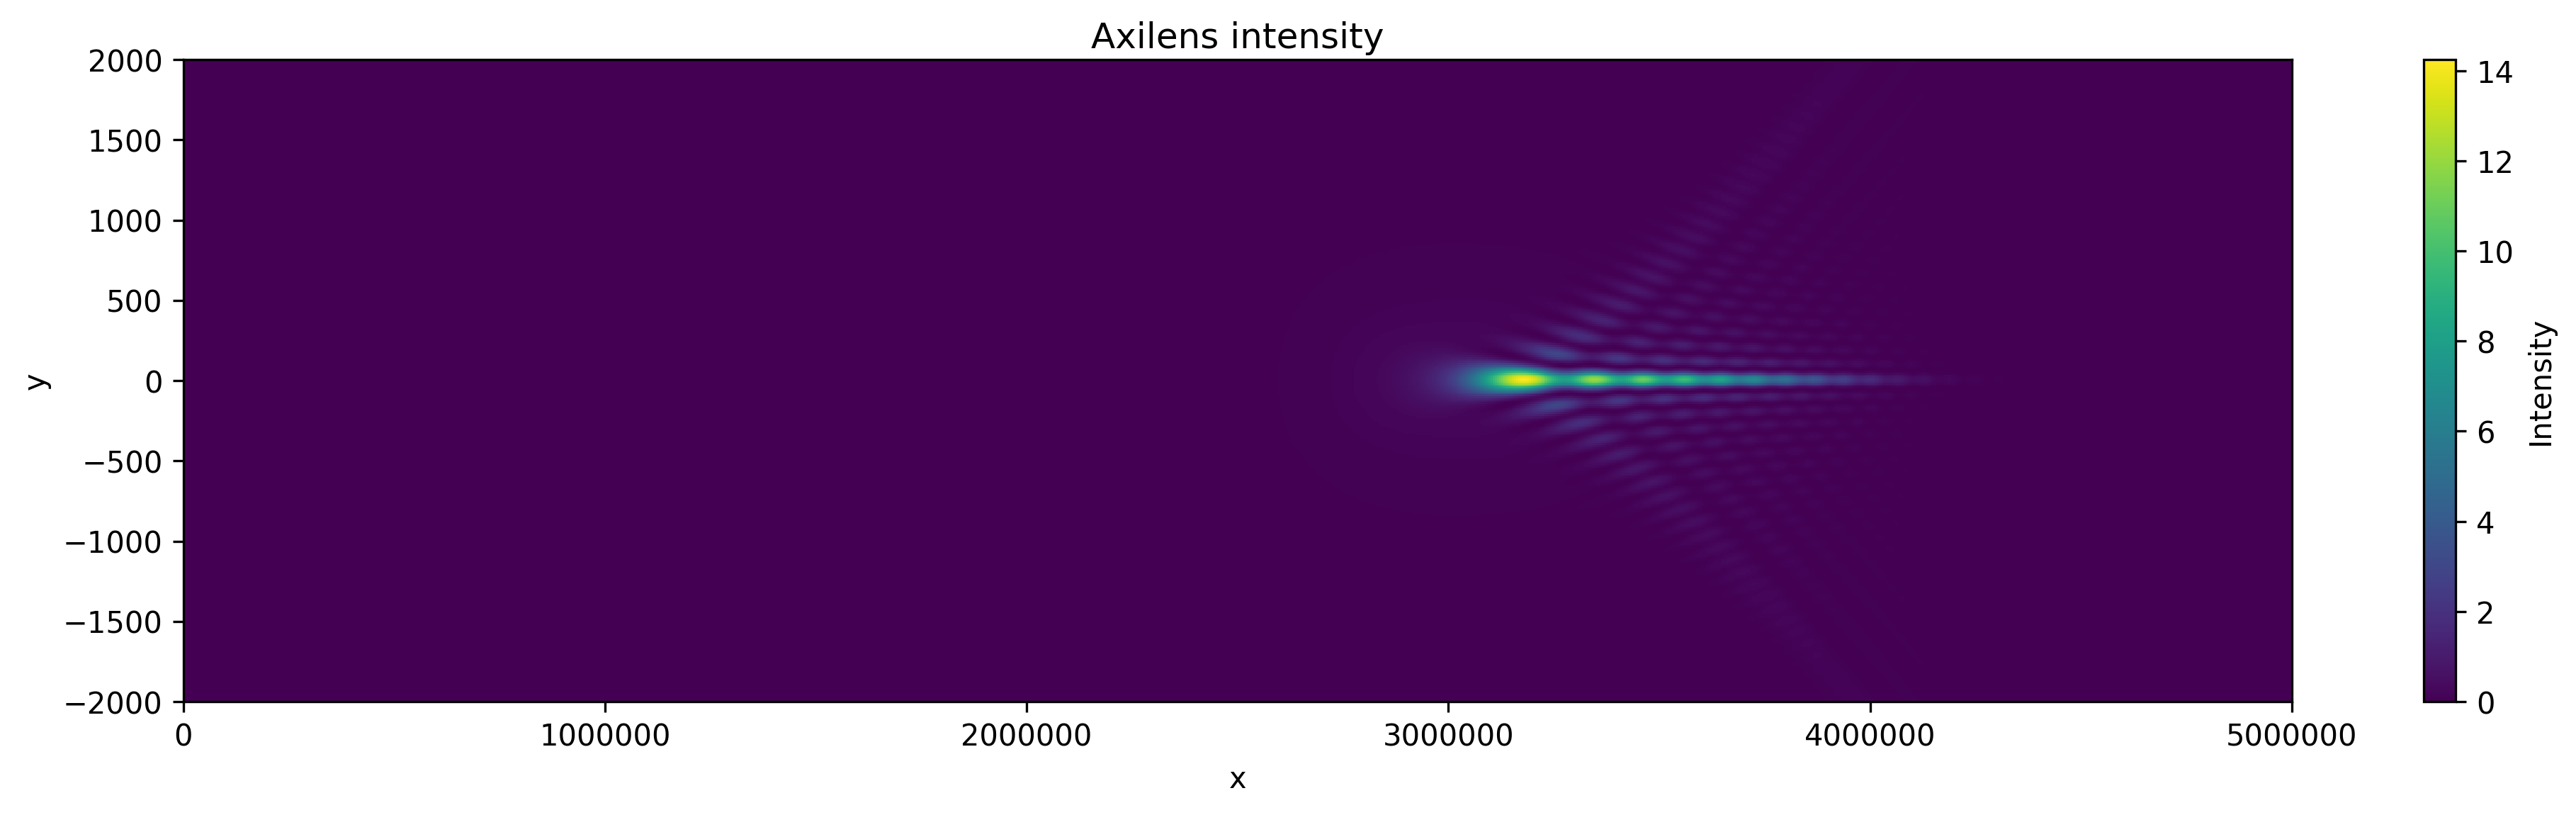

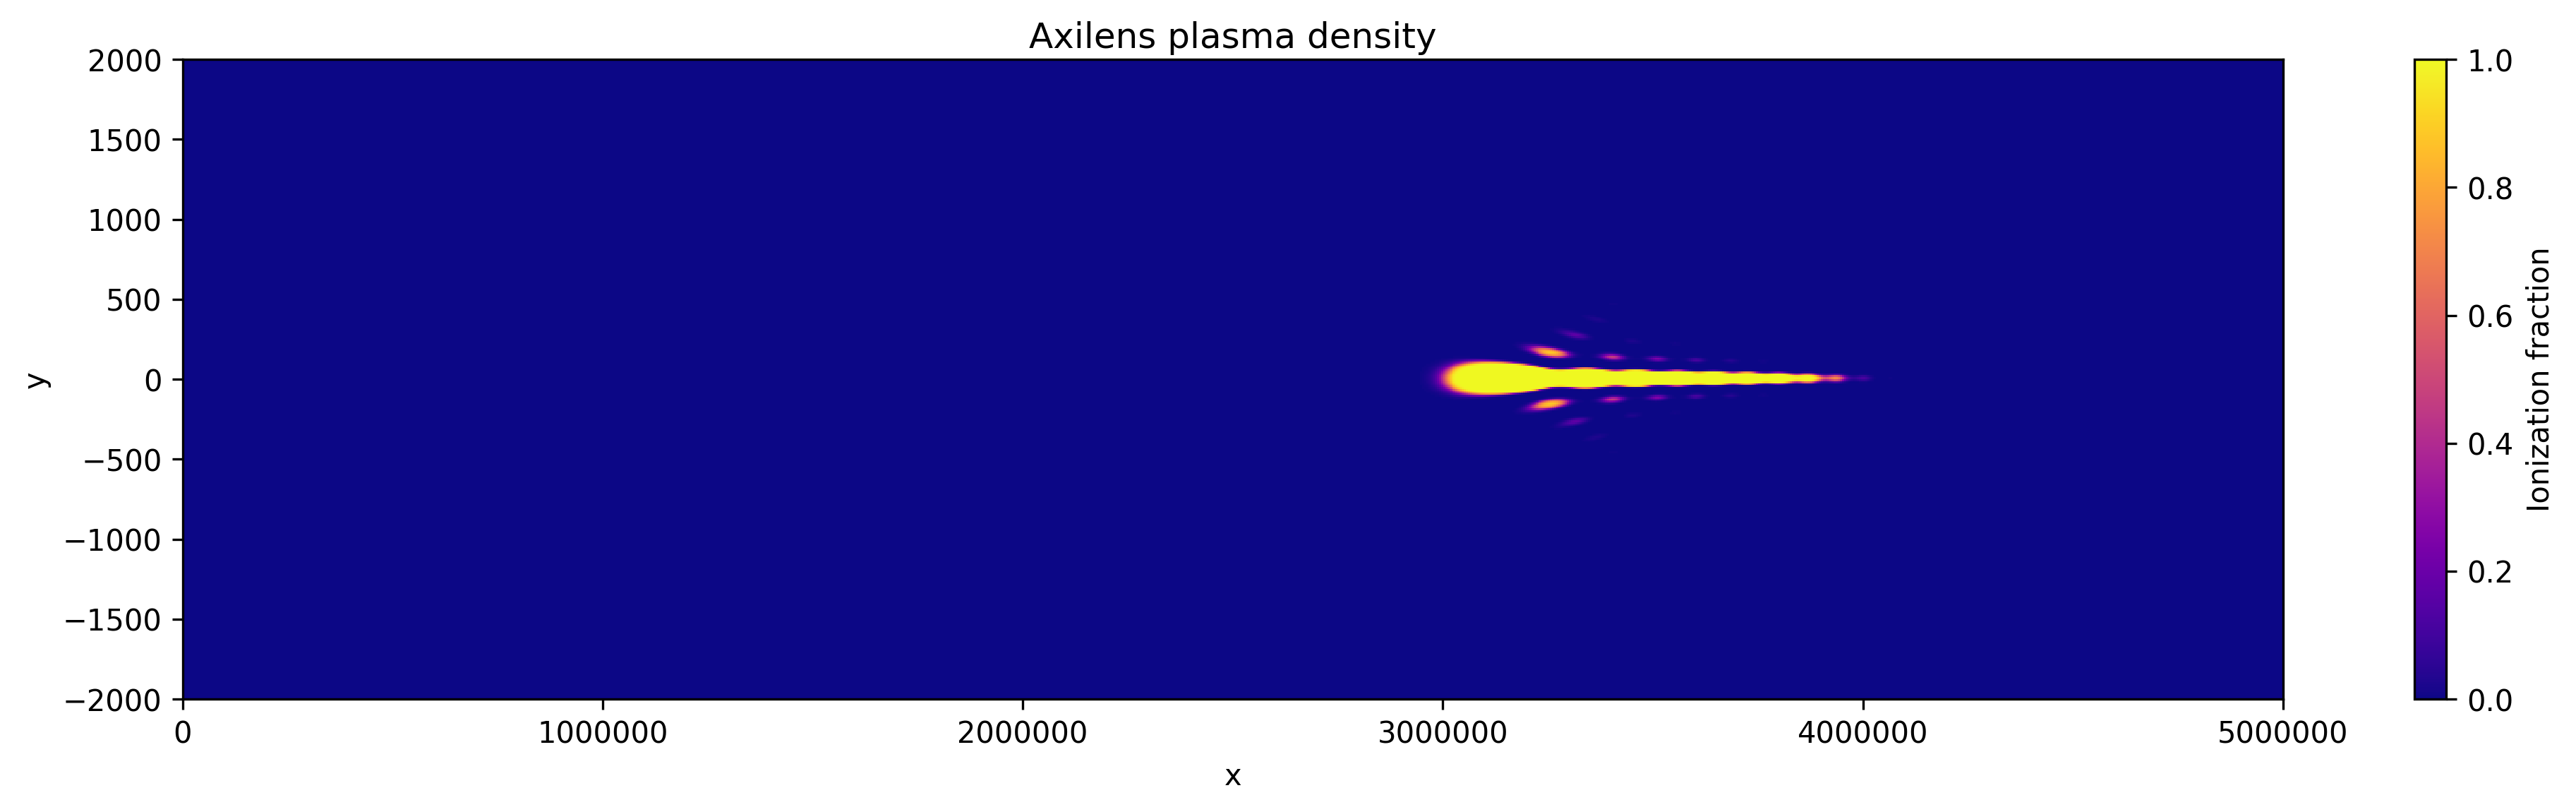

In [4]:
field = np.zeros((1000, beamParams['Nx']), dtype='complex128')
for i in range(1000):
    field[i, :] = beam.load_field(i)[0]
X = beam.X
plt.figure(figsize=(16, 4), dpi=300)
I = beam.intensity_from_field(field)
I = beam.prep_data(I)
im = plt.imshow(I, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Intensity')
plt.set_cmap('viridis')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens intensity')
plt.show()

frac = adk.gaussian_frac(atom['EI'], abs(field), tau, atom['Z'], atom['l'], atom['m'])
plt.figure(figsize=(16, 4), dpi=300)
frac = beam.prep_data(frac)
im = plt.imshow(frac, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.set_cmap('plasma')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens plasma density')
plt.show()

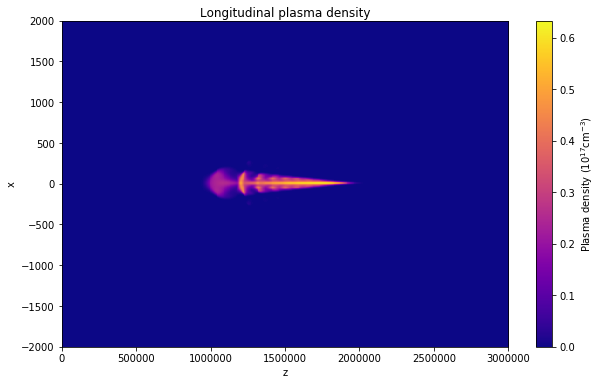

In [5]:
# Maximum plasma extent is from about 2-5 meters so lets do everything in that region
# Caclulate the peak electric field from the beam energy
Energy = 57.6e-3 #J
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beamParams['name'] = '58mJ_Axilens_Input_SG'
beam58In = laserbeam.SuperGaussianLaser(beamParams)
interactions.beam_phase(beam58In, axilens)
beam58In.propagate(2e6, 1.0)
pulseParams['r'] = beam58In.x
pulseParams['E'] = beam58In.e[:, int(beam.Ny/2)]
pulseParams['name'] = '58mJ_Axilens_H2_Pulse'
pulse = laserpulse.RadialPulse(pulseParams)
plasmaParams['name'] = '58mJ_H2'
plasmaH2 = plasma.UniformPlasma(plasmaParams)
interactions.pulse_plasma(pulse, plasmaH2)
plasmaH2.plot_long_density_center(lim=[-2000, 2000])

In [6]:
# Create the super Gaussian beam, pass it through the axilens, and propagate it
beamParams['waist'] = axilensParams['R'] = w0 = 20e3
beamParams['order'] = n = 8
# Caclulate the peak electric field from the beam energy
Energy = 63.4e-3 #J
A = 1.32721e-12
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beam = laserbeam.SuperGaussianLaser(beamParams)
axilens = optic.Axilens(axilensParams)
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                     beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axilens)
z = np.linspace(0, 5e6, 1000)
beam.propagate(z, 1.0)

#beam.propagate(2e6, 1.0)
#beam.plot_current_intensity()

Power: 1.12411315627


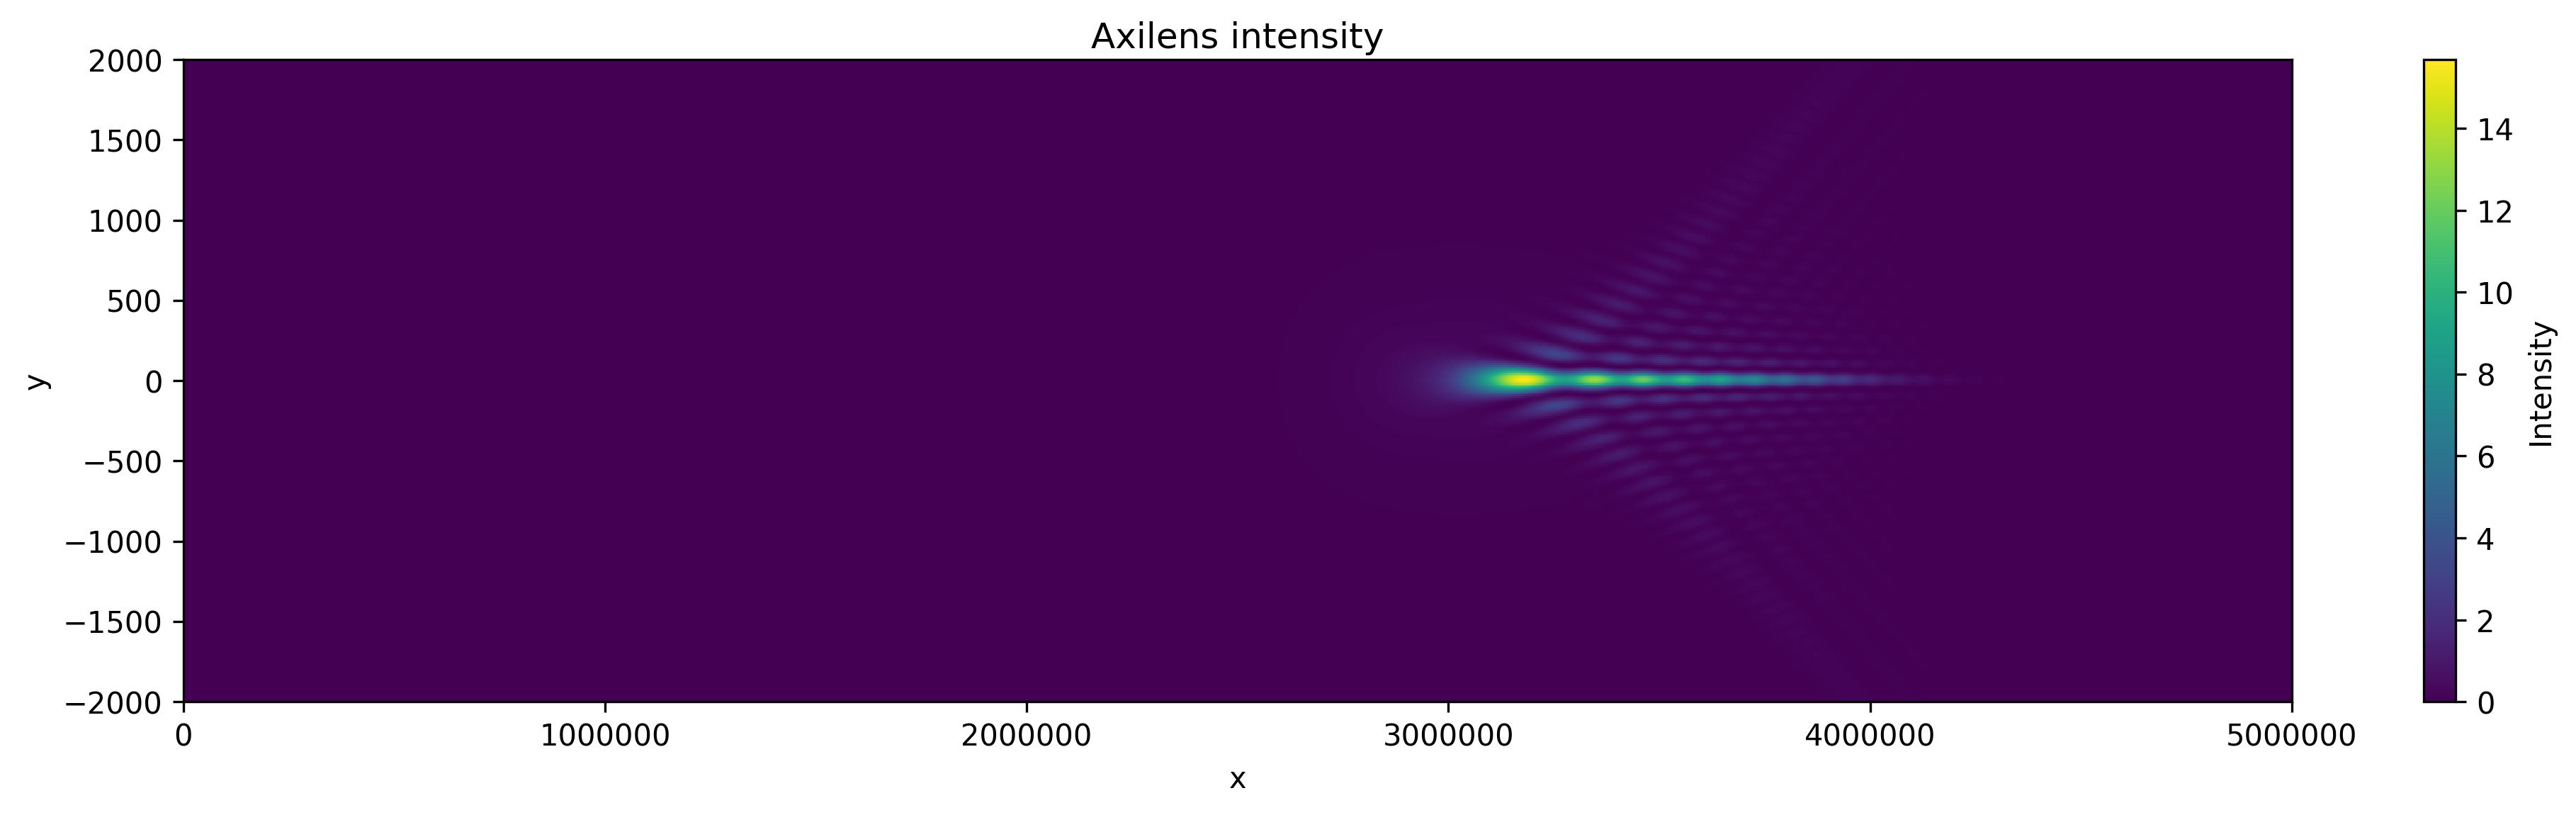

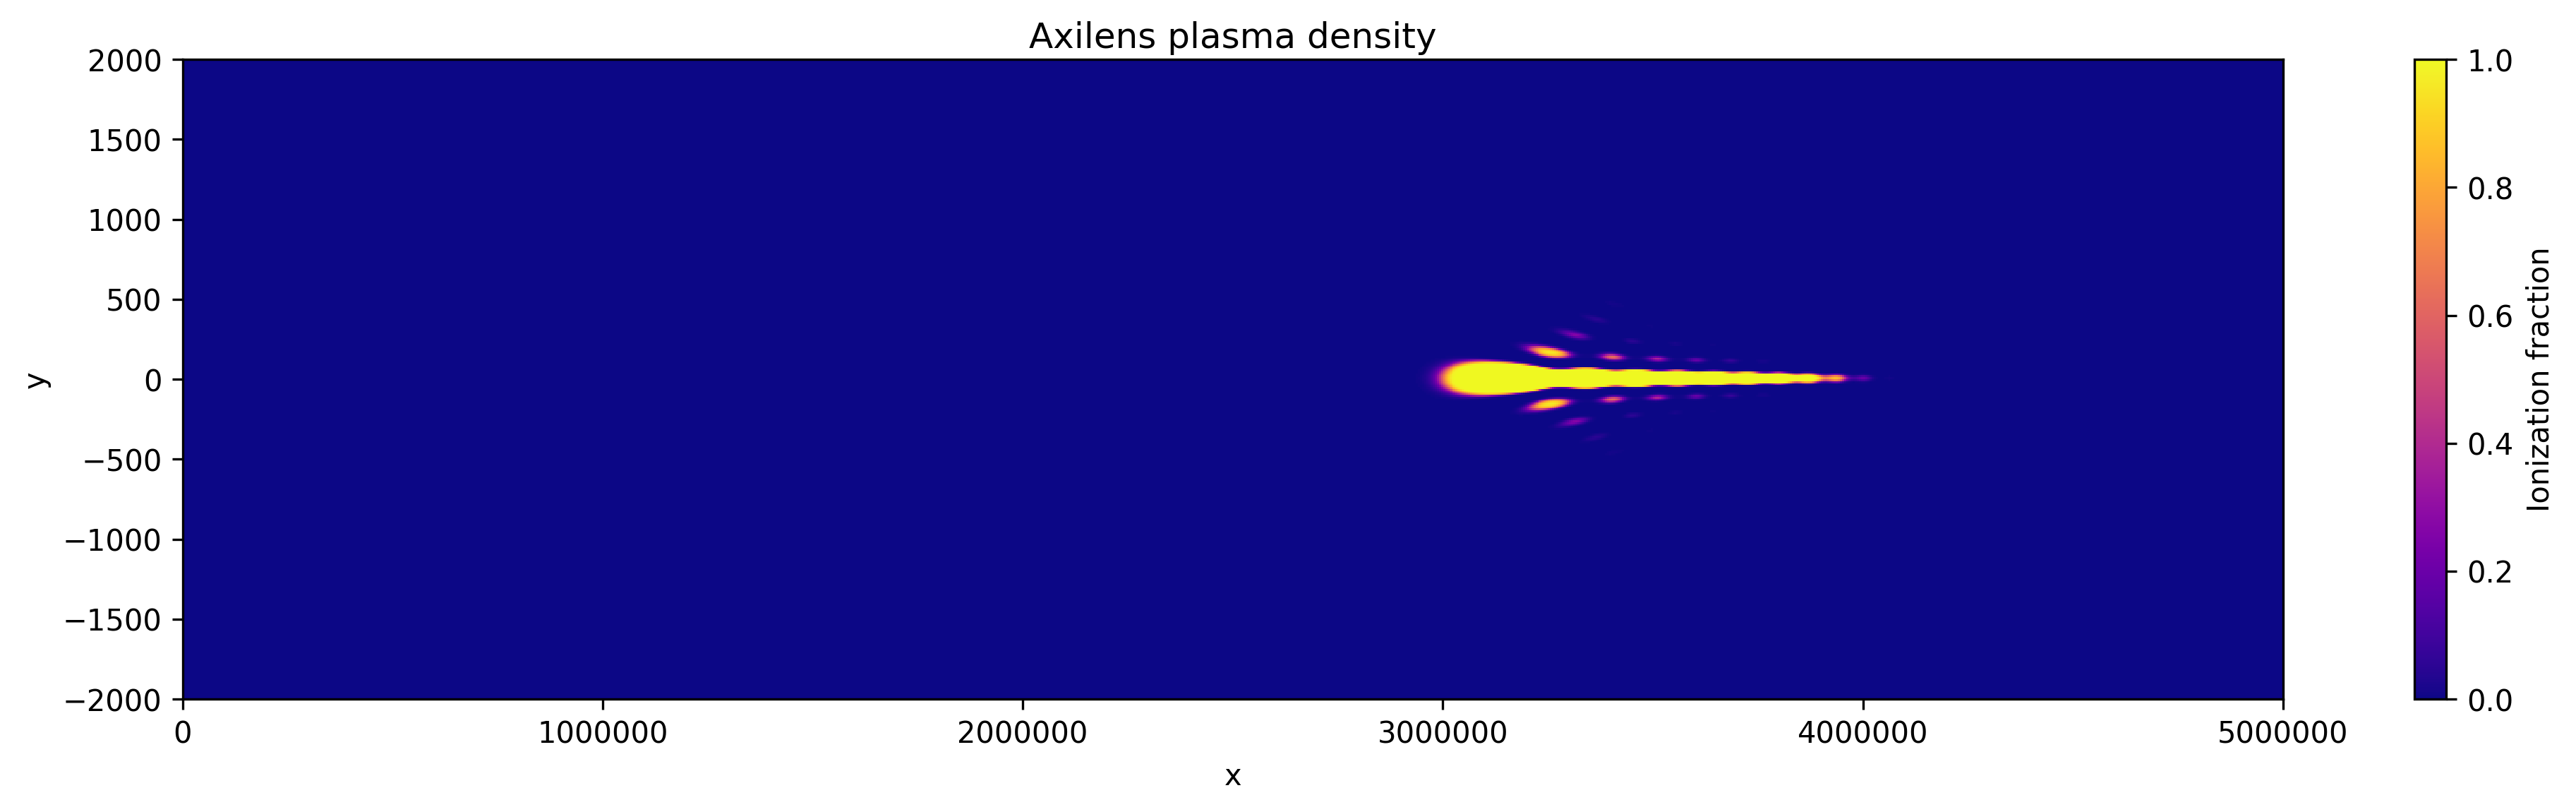

In [7]:
field = np.zeros((1000, beamParams['Nx']), dtype='complex128')
for i in range(1000):
    field[i, :] = beam.load_field(i)[0]
X = beam.X
plt.figure(figsize=(16, 4), dpi=300)
I = beam.intensity_from_field(field)
I = beam.prep_data(I)
im = plt.imshow(I, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Intensity')
plt.set_cmap('viridis')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens intensity')
plt.show()

frac = adk.gaussian_frac(atom['EI'], abs(field), tau, atom['Z'], atom['l'], atom['m'])
plt.figure(figsize=(16, 4), dpi=300)
frac = beam.prep_data(frac)
im = plt.imshow(frac, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.set_cmap('plasma')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens plasma density')
plt.show()

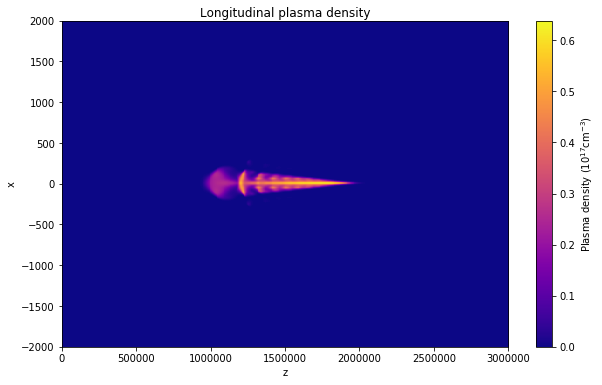

In [8]:
# Maximum plasma extent is from about 2-5 meters so lets do everything in that region
# Caclulate the peak electric field from the beam energy
Energy = 63.4e-3 #J
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beamParams['name'] = '63mJ_Axilens_Input_SG'
beam63In = laserbeam.SuperGaussianLaser(beamParams)
interactions.beam_phase(beam63In, axilens)
beam63In.propagate(2e6, 1.0)
pulseParams['r'] = beam63In.x
pulseParams['E'] = beam63In.e[:, int(beam.Ny/2)]
pulseParams['name'] = '63mJ_Axilens_H2_Pulse'
pulse = laserpulse.RadialPulse(pulseParams)
plasmaParams['name'] = '63mJ_H2'
plasmaH2 = plasma.UniformPlasma(plasmaParams)
interactions.pulse_plasma(pulse, plasmaH2)
plasmaH2.plot_long_density_center(lim=[-2000, 2000])

In [9]:
# Create the super Gaussian beam, pass it through the axilens, and propagate it
beamParams['waist'] = axilensParams['R'] = w0 = 20e3
beamParams['order'] = n = 8
# Caclulate the peak electric field from the beam energy
Energy = 51.8e-3 #J
A = 1.32721e-12
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beam = laserbeam.SuperGaussianLaser(beamParams)
axilens = optic.Axilens(axilensParams)
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                     beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axilens)
z = np.linspace(0, 5e6, 1000)
beam.propagate(z, 1.0)

#beam.propagate(2e6, 1.0)
#beam.plot_current_intensity()

Power: 0.918439455758


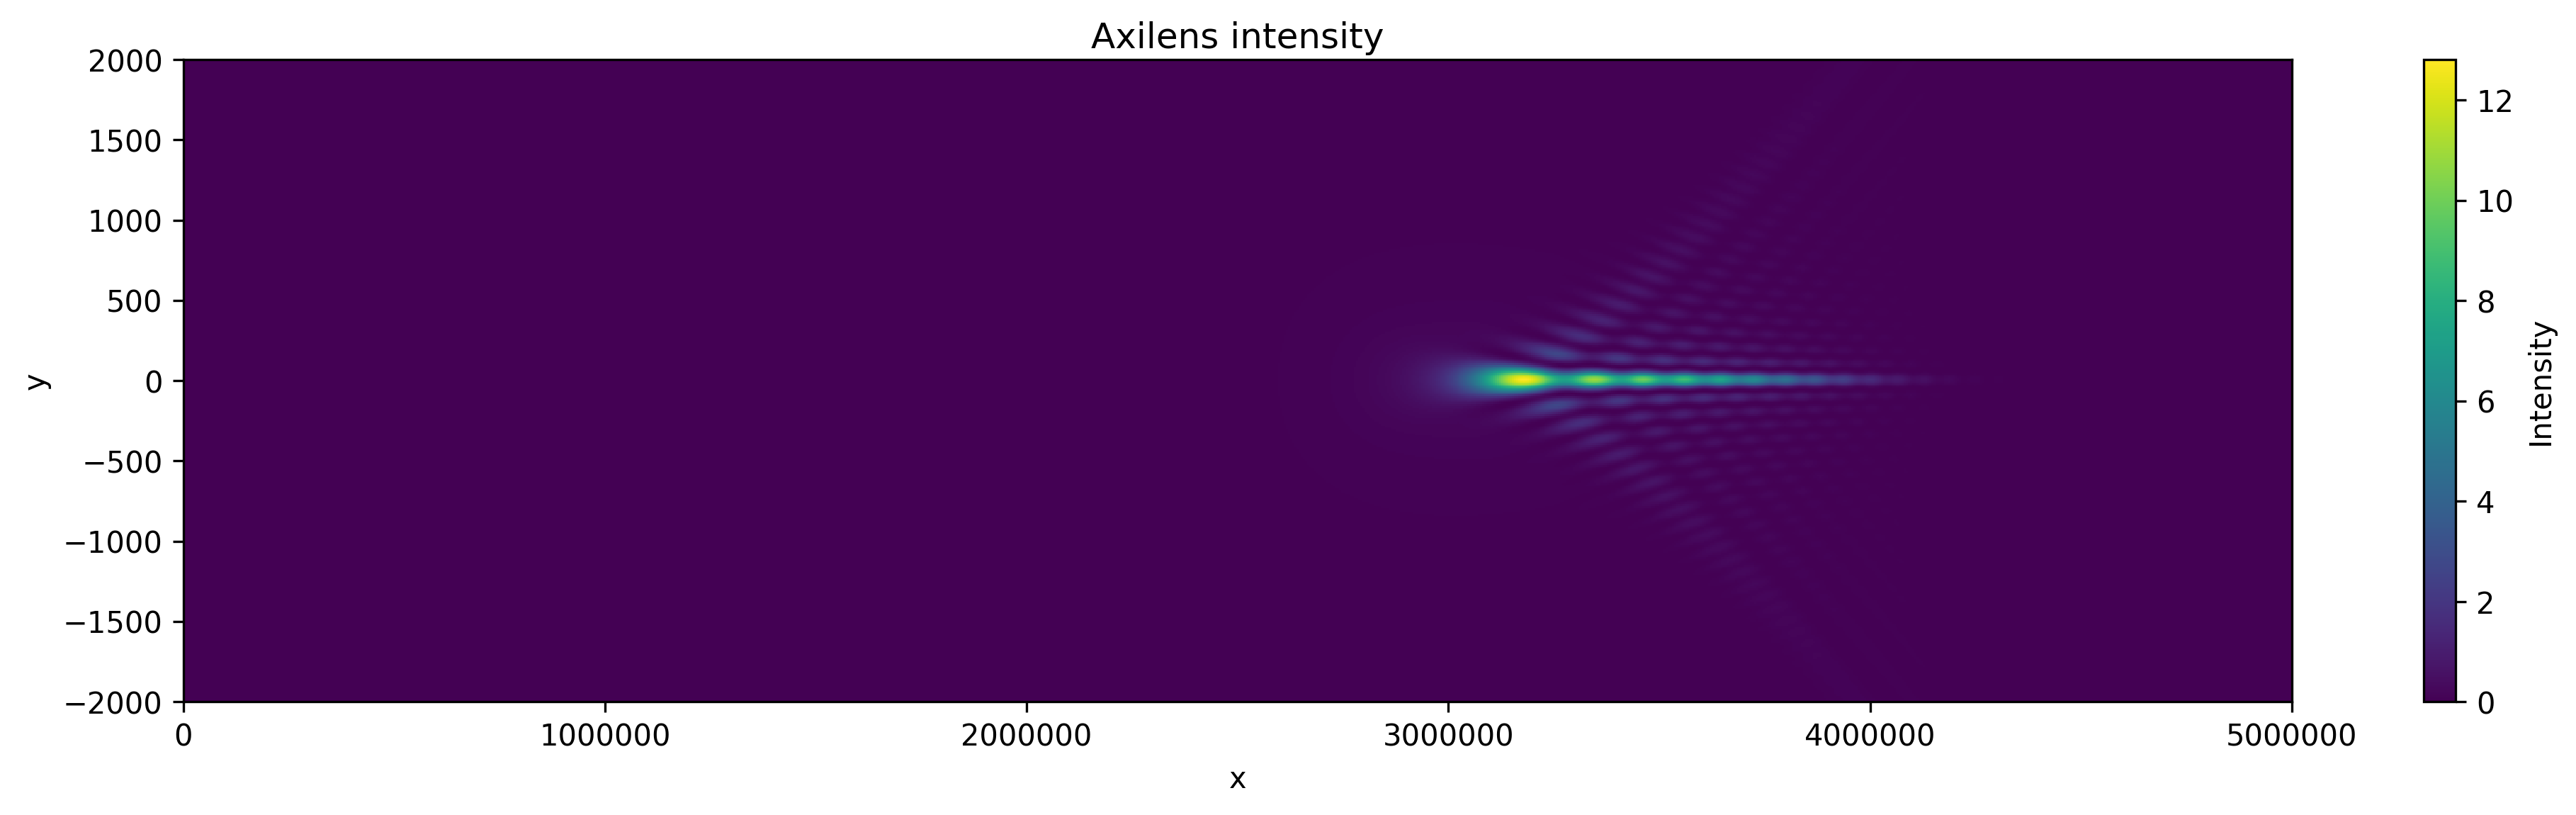

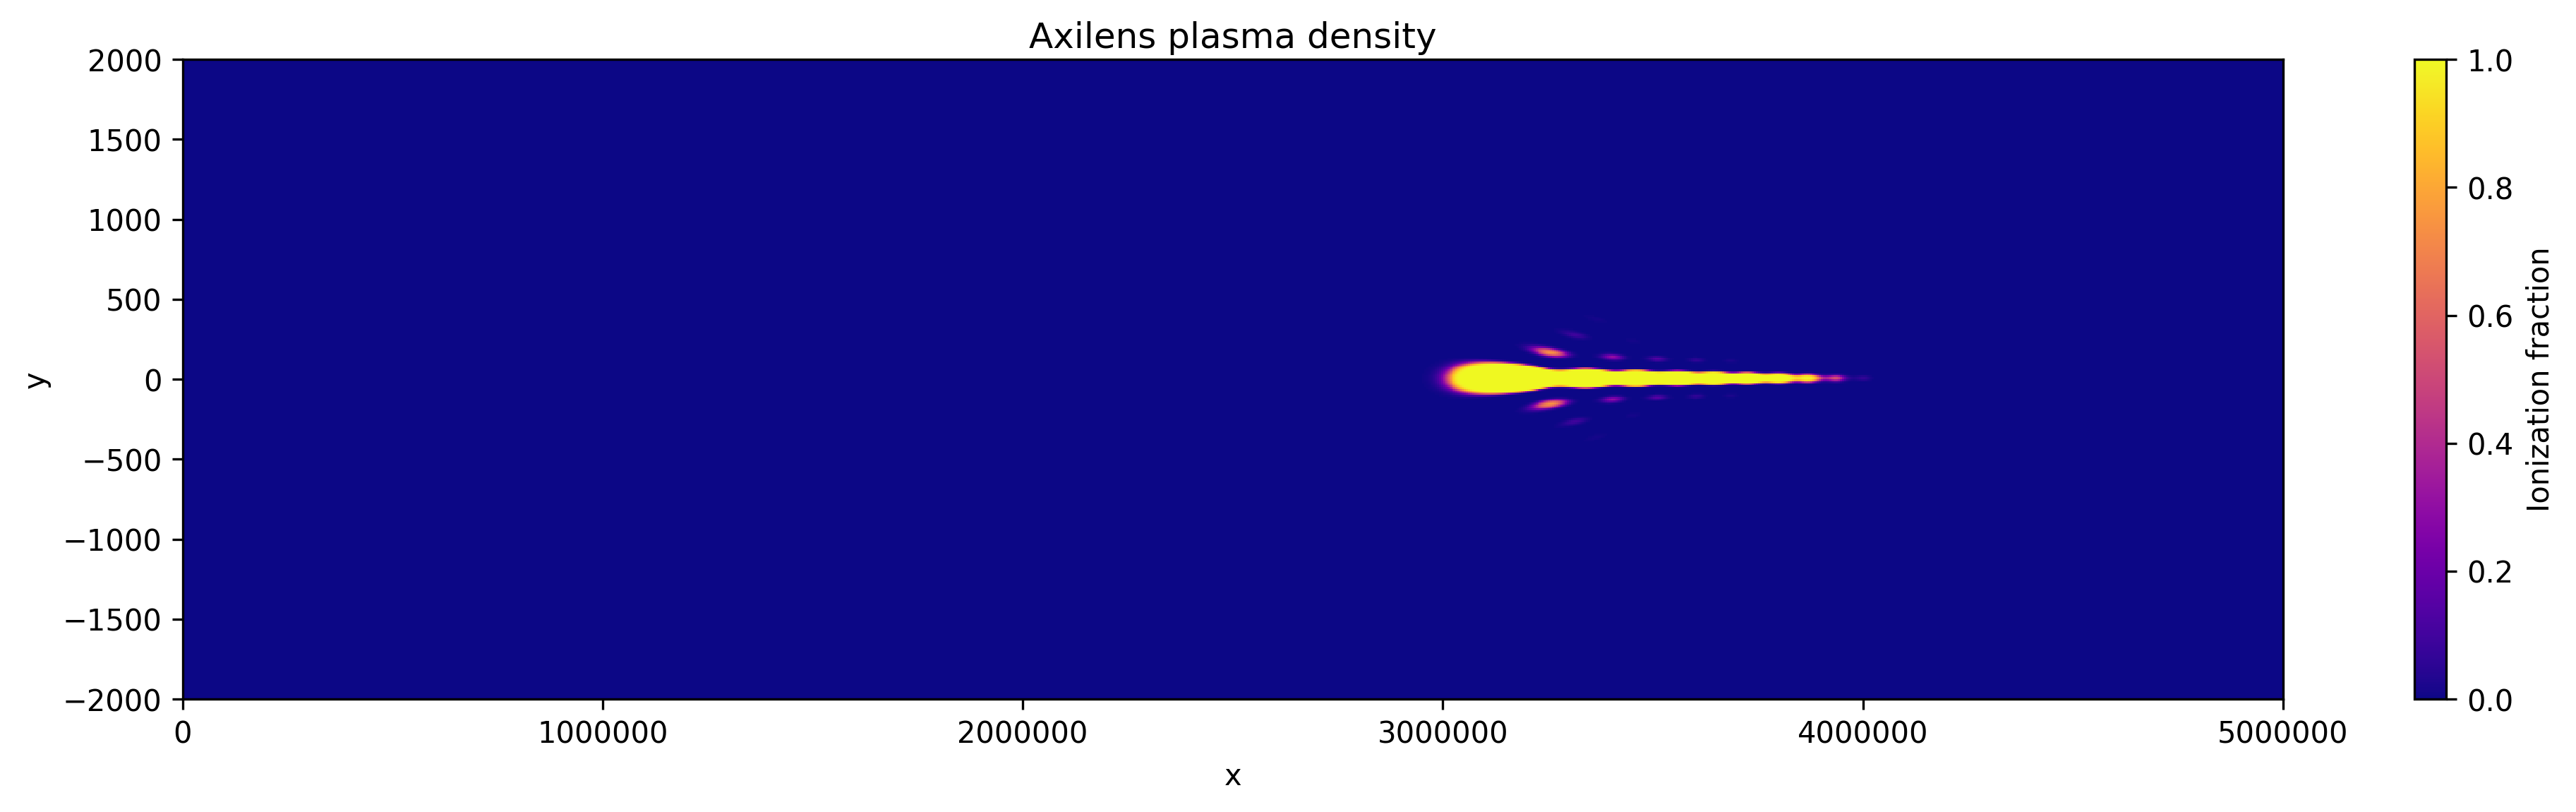

In [10]:
field = np.zeros((1000, beamParams['Nx']), dtype='complex128')
for i in range(1000):
    field[i, :] = beam.load_field(i)[0]
X = beam.X
plt.figure(figsize=(16, 4), dpi=300)
I = beam.intensity_from_field(field)
I = beam.prep_data(I)
im = plt.imshow(I, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Intensity')
plt.set_cmap('viridis')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens intensity')
plt.show()

frac = adk.gaussian_frac(atom['EI'], abs(field), tau, atom['Z'], atom['l'], atom['m'])
plt.figure(figsize=(16, 4), dpi=300)
frac = beam.prep_data(frac)
im = plt.imshow(frac, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.set_cmap('plasma')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens plasma density')
plt.show()

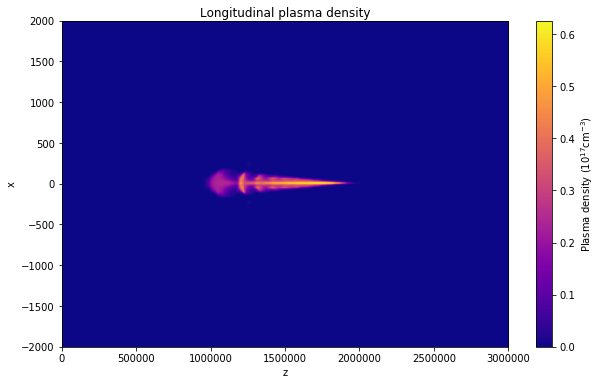

In [11]:
# Maximum plasma extent is from about 2-5 meters so lets do everything in that region
# Caclulate the peak electric field from the beam energy
Energy = 51.8e-3 #J
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beamParams['name'] = '52mJ_Axilens_Input_SG'
beam52In = laserbeam.SuperGaussianLaser(beamParams)
interactions.beam_phase(beam52In, axilens)
beam52In.propagate(2e6, 1.0)
pulseParams['r'] = beam52In.x
pulseParams['E'] = beam52In.e[:, int(beam.Ny/2)]
pulseParams['name'] = '52mJ_Axilens_H2_Pulse'
pulse = laserpulse.RadialPulse(pulseParams)
plasmaParams['name'] = '52mJ_H2'
plasmaH2 = plasma.UniformPlasma(plasmaParams)
interactions.pulse_plasma(pulse, plasmaH2)
plasmaH2.plot_long_density_center(lim=[-2000, 2000])

In [12]:
atom = ionization.H
plasmaParams['atom'] = atom
plasmaParams['n0'] = 1.4

In [ ]:
# Create the super Gaussian beam, pass it through the axilens, and propagate it
beamParams['waist'] = axilensParams['R'] = w0 = 20e3
beamParams['order'] = n = 8
# Caclulate the peak electric field from the beam energy
Energy = 57.6e-3 #J
A = 1.32721e-12
beamParams['E0'] = np.sqrt(4**(1/n)*Energy / (tau*A*np.pi*w0**2*gamma(2/n+1)))
beam = laserbeam.SuperGaussianLaser(beamParams)
axilens = optic.Axilens(axilensParams)
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                     beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axilens)
z = np.linspace(0, 5e6, 1000)
beam.propagate(z, 1.0)

#beam.propagate(2e6, 1.0)
#beam.plot_current_intensity()

Power: 1.02127630602


In [ ]:
field = np.zeros((1000, beamParams['Nx']), dtype='complex128')
for i in range(1000):
    field[i, :] = beam.load_field(i)[0]
X = beam.X
plt.figure(figsize=(16, 4), dpi=300)
I = beam.intensity_from_field(field)
I = beam.prep_data(I)
im = plt.imshow(I, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Intensity')
plt.set_cmap('viridis')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens intensity')
plt.show()

frac = adk.gaussian_frac(atom['EI'], abs(field), tau, atom['Z'], atom['l'], atom['m'])
plt.figure(figsize=(16, 4), dpi=300)
frac = beam.prep_data(frac)
im = plt.imshow(frac, aspect='auto', extent=[0, 5e6, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'Ionization fraction')
plt.set_cmap('plasma')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim([-2e3, 2e3])
plt.title('Axilens plasma density')
plt.show()

In [ ]:
# Maximum plasma extent is from about 2-5 meters so lets do everything in that region
# Caclulate the peak electric field from the beam energy
pulseParams['r'] = beam58In.x
pulseParams['E'] = beam58In.e[:, int(beam.Ny/2)]
pulseParams['name'] = '58mJ_Axilens_H_Pulse'
pulse = laserpulse.RadialPulse(pulseParams)
plasmaParams['name'] = '58mJ_H'
plasmaH2 = plasma.UniformPlasma(plasmaParams)
interactions.pulse_plasma(pulse, plasmaH2)
plasmaH2.plot_long_density_center(lim=[-2000, 2000])